In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils.vis_utils import model_to_dot
from keras.wrappers.scikit_learn import KerasRegressor

from IPython.display import SVG

import shap

/opt/homebrew/Caskroom/miniconda/base/envs/tensor/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.options.display.max_columns = None

df = pd.read_csv('../data/processed/final.csv', encoding='utf-8')
df.head()

,ID,Name,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,require guest profile picture,instant bookable,host is superhost,host identity verified,require guest phone verification,host has profile pic,is location exact,requires license,family/kid friendly,stair gates,private entrance,firm mattress,long term stays allowed,garden or backyard,dryer,free parking on street,beach essentials,essentials,dishwasher,fire extinguisher,luggage dropoff allowed,waterfront,pocket wifi,hot tub,smart lock,washer,babysitter recommendations,suitable for events,smoking allowed,indoor fireplace,patio or balcony,wide hallway clearance,high chair,bathtub,game console,breakfast,first aid kit,fireplace guards,air conditioning,oven,wide clearance to shower and toilet,crib,window guards,lake access,paid parking off premises,laptop friendly workspace,flat smooth pathway to front door,elevator in building,children’s books and toys,lockbox,safety card,outlet covers,smoke detector,pets allowed,accessible-height toilet,24-hour check-in,children’s dinnerware,accessible-height bed,buzzer/wireless intercom,grab-rails for shower and toilet,disabled parking spot,tub with shower bench,firm matress,heating,kitchen,keypad,wide clearance to bed,cooking basics,iron,other pet(s),free parking on premises,bbq grill,wheelchair accessible,beachfront,microwave,baby bath,refrigerator,wireless internet,doorman entry,dog(s),ev charger,gym,single level home,step-free access,lock on bedroom door,bed linens,cat(s),cable tv,shampoo,smartlock,wide doorway,translation missing: en.hosting_amenity_49,doorman,internet,self check-in,changing table,roll-in shower with shower bench or chair,translation missing: en.hosting_amenity_50,pack ’n play/travel crib,hangers,room-darkening shades,private bathroom,path to entrance lit at night,table corner guards,tv,washer / dryer,extra pillows and blankets,coffee maker,pets live on this property,ethernet connection,dishes and silverware,pool,hair dryer,hot water,stove,carbon monoxide detector,private living room,cleaning before checkout,baby monitor,Summary,Description,Neighborhood Overview,Access,Transit,House Rules
0,6,Heart of North Park ~ Large Craftsmen Home w/ ...,29,2008-03-03,4.0,100.00000,1.0,1.0,181.364666,158.590834,133.040921,156.265711,159.950205,0.0,5.0,2.0,2.0,2.0,0.0,425.0,1.0,0.0,3.0,30.0,14.0,14.0,42.0,42.0,44.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,1.0,0.45,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.9843,0.9942,0.9468,0.3818,0.9380,0.6808
1,109,Amazing bright elegant condo park front *UPGRA...,521,2008-06-27,4.0,100.00000,1.0,1.0,120.574380,158.590834,106.187970,156.265711,177.112083,0.0,6.0,2.0,2.0,3.0,0.0,122.0,3.0,25.0,7.0,730.0,0.0,0.0,0.0,0.0,2.0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,2.0,0.03,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0.8828,0.9773,0.0000,0.0000,0.0000,0.9255
2,344,Family perfect;Pool;Near Studios!,767,2008-07-11,0.0,93.61078,1.0,1.0,112.772201,158.590834,108.543103,156.265711,159.950205,0.0,6.0,1.0,3.0,3.0,0.0,168.0,1.0,0.0,1.0,730.0,0.0,0.0,0.0,0.0,1.0,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.09,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1

In [3]:
X = df.drop(['ID', 'Name', 'Host ID', 'Host Since', 'Price'], axis=1)
y = df['Price']

X.head()

,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,require guest profile picture,instant bookable,host is superhost,host identity verified,require guest phone verification,host has profile pic,is location exact,requires license,family/kid friendly,stair gates,private entrance,firm mattress,long term stays allowed,garden or backyard,dryer,free parking on street,beach essentials,essentials,dishwasher,fire extinguisher,luggage dropoff allowed,waterfront,pocket wifi,hot tub,smart lock,washer,babysitter recommendations,suitable for events,smoking allowed,indoor fireplace,patio or balcony,wide hallway clearance,high chair,bathtub,game console,breakfast,first aid kit,fireplace guards,air conditioning,oven,wide clearance to shower and toilet,crib,window guards,lake access,paid parking off premises,laptop friendly workspace,flat smooth pathway to front door,elevator in building,children’s books and toys,lockbox,safety card,outlet covers,smoke detector,pets allowed,accessible-height toilet,24-hour check-in,children’s dinnerware,accessible-height bed,buzzer/wireless intercom,grab-rails for shower and toilet,disabled parking spot,tub with shower bench,firm matress,heating,kitchen,keypad,wide clearance to bed,cooking basics,iron,other pet(s),free parking on premises,bbq grill,wheelchair accessible,beachfront,microwave,baby bath,refrigerator,wireless internet,doorman entry,dog(s),ev charger,gym,single level home,step-free access,lock on bedroom door,bed linens,cat(s),cable tv,shampoo,smartlock,wide doorway,translation missing: en.hosting_amenity_49,doorman,internet,self check-in,changing table,roll-in shower with shower bench or chair,translation missing: en.hosting_amenity_50,pack ’n play/travel crib,hangers,room-darkening shades,private bathroom,path to entrance lit at night,table corner guards,tv,washer / dryer,extra pillows and blankets,coffee maker,pets live on this property,ethernet connection,dishes and silverware,pool,hair dryer,hot water,stove,carbon monoxide detector,private living room,cleaning before checkout,baby monitor,Summary,Description,Neighborhood Overview,Access,Transit,House Rules
0,4.0,100.00000,1.0,1.0,181.364666,158.590834,133.040921,156.265711,159.950205,0.0,5.0,2.0,2.0,2.0,0.0,1.0,0.0,3.0,30.0,14.0,14.0,42.0,42.0,44.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,1.0,0.45,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.9843,0.9942,0.9468,0.3818,0.9380,0.6808
1,4.0,100.00000,1.0,1.0,120.574380,158.590834,106.187970,156.265711,177.112083,0.0,6.0,2.0,2.0,3.0,0.0,3.0,25.0,7.0,730.0,0.0,0.0,0.0,0.0,2.0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,2.0,0.03,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0.8828,0.9773,0.0000,0.0000,0.0000,0.9255
2,0.0,93.61078,1.0,1.0,112.772201,158.590834,108.543103,156.265711,159.950205,0.0,6.0,1.0,3.0,3.0,0.0,1.0,0.0,1.0,730.0,0.0,0.0,0.0,0.0,1.0,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.09,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0.9679,0.9944,0.8268,0.4404,0.5574,-0.1184
3,4.0,95.

In [4]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=42)

In [5]:
def create_model(input_shape, dropout=0.3, lr=0.001, layers=[128, 256, 256], activation='relu'):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=input_shape, activation=activation))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())

    for l in layers[1:]:
        model.add(Dense(l, activation=activation))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    
    model.add(Dense(1, activation='linear'))

    op = Adam(learning_rate=lr)
    model.compile(optimizer=op, loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

    return model

In [6]:
dnn = create_model(X_train[0].shape)
dnn.summary()

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               20352     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256

2022-12-04 21:06:43.193844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-04 21:06:43.193994: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


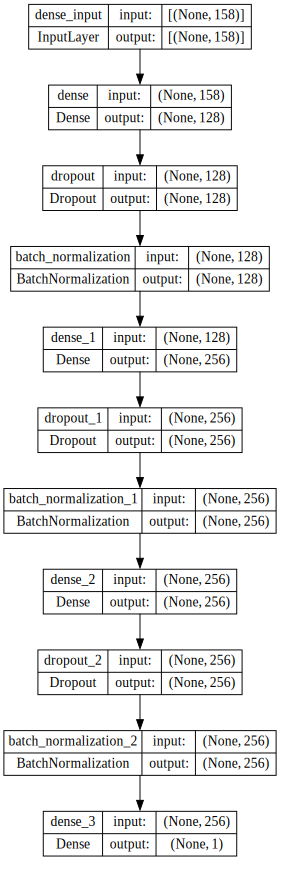

In [7]:
SVG(model_to_dot(dnn, show_layer_names=True, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [10]:
history = dnn.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20


2022-12-04 15:55:09.540661: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-04 15:55:09.975637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1282/1282 [==============================] - ETA: 0s - loss: 11882.8672 - mean_squared_error: 11882.8672 - mean_absolute_error: 71.2876

2022-12-04 15:55:29.564055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1282/1282 [==============================] - 21s 16ms/step - loss: 11882.8672 - mean_squared_error: 11882.8672 - mean_absolute_error: 71.2876 - val_loss: 5736.4756 - val_mean_squared_error: 5736.4756 - val_mean_absolute_error: 41.0830
Epoch 2/20
1282/1282 [==============================] - 20s 16ms/step - loss: 5923.8774 - mean_squared_error: 5923.8774 - mean_absolute_error: 43.8757 - val_loss: 5742.3218 - val_mean_squared_error: 5742.3218 - val_mean_absolute_error: 41.1943
Epoch 3/20
1282/1282 [==============================] - 20s 15ms/step - loss: 5769.6484 - mean_squared_error: 5769.6484 - mean_absolute_error: 43.2269 - val_loss: 5479.4688 - val_mean_squared_error: 5479.4688 - val_mean_absolute_error: 41.2321
Epoch 4/20
1282/1282 [==============================] - 20s 16ms/step - loss: 5642.2729 - mean_squared_error: 5642.2729 - mean_absolute_error: 42.6703 - val_loss: 5563.9102 - val_mean_squared_error: 5563.9102 - val_mean_absolute_error: 42.3647
Epoch 5/20
1282/1282 [===========

  30/5126 [..............................] - ETA: 18s

2022-12-04 16:02:07.328134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1602/1602 [==============================] - 5s 3ms/step
Training MSE: 4416.0014
Testing MSE: 5194.2169

Training MAE: 38.0478
Testing MAE: 40.2523

Training r2: 0.7211
Testing r2: 0.6711


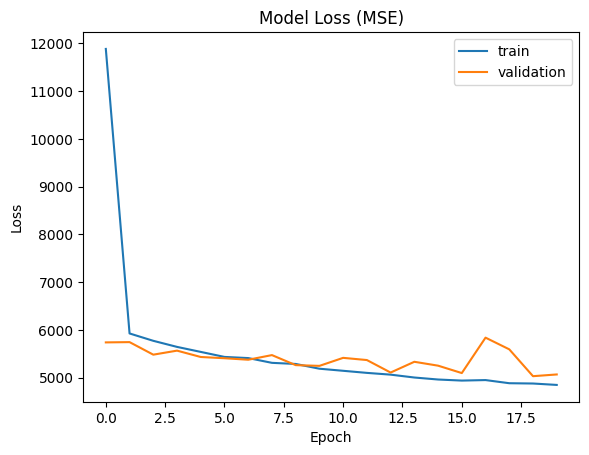

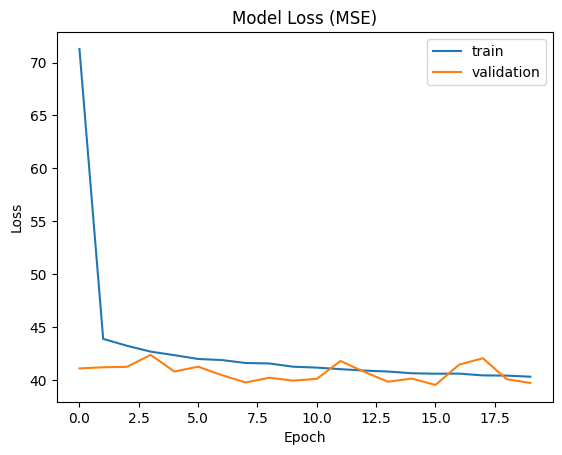

In [11]:
y_train_pred = dnn.predict(X_train)
y_test_pred = dnn.predict(X_test)

print('Training MSE:', round(mean_squared_error(y_train, y_train_pred),4))
print('Testing MSE:', round(mean_squared_error(y_test, y_test_pred),4))
print()
print('Training MAE:', round(mean_absolute_error(y_train, y_train_pred),4))
print('Testing MAE:', round(mean_absolute_error(y_test, y_test_pred),4))
print()
print('Training r2:', round(r2_score(y_train, y_train_pred),4))
print('Testing r2:', round(r2_score(y_test, y_test_pred),4))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [8]:
learning_rate = [1e-2, 1e-3, 1e-4]
dropout = [0.3, 0.4]
layers = [[128, 256, 256, 512, 512, 84], [128, 512, 256, 128, 84]]
batch_size = [64, 128, 256]
epochs = [30]

grid = dict(
    input_shape=[X_train[0].shape],
    dropout=dropout,
    lr=learning_rate,
    layers=layers,
    batch_size=batch_size,
    epochs=epochs
)

In [9]:
model = KerasRegressor(build_fn=create_model, verbose=0)

search = GridSearchCV(estimator=model, cv=3, param_grid=grid, scoring='neg_mean_absolute_error', n_jobs=-1)
# search = RandomizedSearchCV(estimator=model, cv=3, param_distributions=grid, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1, n_iter=1)

results = search.fit(X_dev, y_dev)

/var/folders/5w/rmz07jmd3cj942021fy4331r0000gn/T/ipykernel_19303/1958928685.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-12-04 21:07:34.330351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-04 21:07:34.330492: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-04 21:07:34.333246: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-04 21:07:34.333366: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-12-05 06:21:19.772219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-05 06:21:19.772361: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-05 06:21:21.298549: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-05 06:21:24.876597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 06:24:46.174721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 06:24:58.164900: I tensorflow/core/grappler/o

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-12-05 08:32:01.288744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-05 08:32:01.289081: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-05 08:32:02.940060: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-05 08:32:07.685266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 08:32:26.219727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 08:32:31.238152: I tensorflow/core/grappler/o

In [10]:
best_score = results.best_score_
best_params = results.best_params_
best_estimator = results.best_estimator_

print("best score is {:.2f} using {}".format(best_score,
	best_params))

best score is -39.78 using {'batch_size': 256, 'dropout': 0.3, 'epochs': 30, 'input_shape': (158,), 'layers': [128, 256, 256, 512, 512, 84], 'lr': 0.001}


In [11]:
y_train_pred_b = best_estimator.predict(X_train)
y_test_pred_b = best_estimator.predict(X_test)

print('Training MSE:', round(mean_squared_error(y_train, y_train_pred_b),4))
print('Testing MSE:', round(mean_squared_error(y_test, y_test_pred_b),4))
print()
print('Training MAE:', round(mean_absolute_error(y_train, y_train_pred_b),4))
print('Testing MAE:', round(mean_absolute_error(y_test, y_test_pred_b),4))
print()
print('Training r2:', round(r2_score(y_train, y_train_pred_b),4))
print('Testing r2:', round(r2_score(y_test, y_test_pred_b),4))

2022-12-05 09:22:26.199703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Training MSE: 4170.3339
Testing MSE: 5134.0581

Training MAE: 37.1149
Testing MAE: 39.6049

Training r2: 0.7366
Testing r2: 0.6749


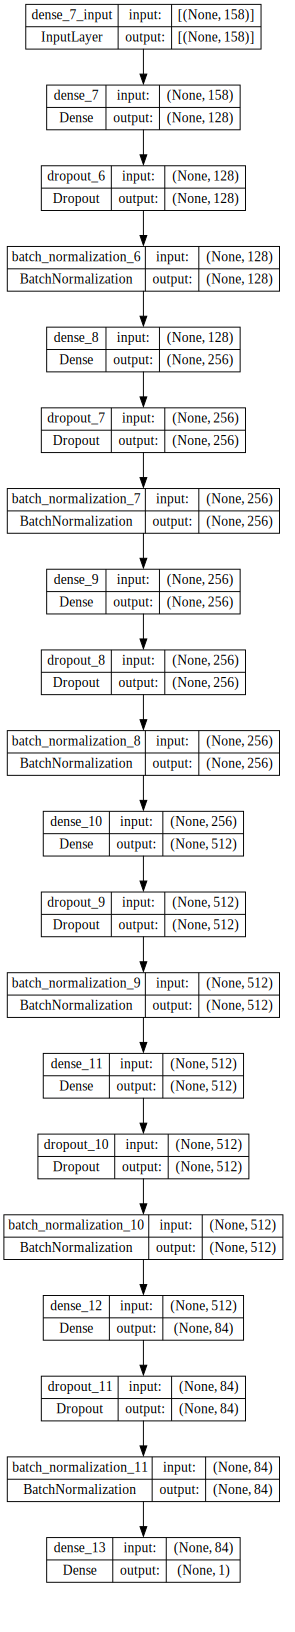

In [7]:
best_model = create_model(X_train[0].shape, dropout=0.3, lr=0.001, layers=[128, 256, 256, 512, 512, 84])

SVG(model_to_dot(best_model, show_layer_names=True, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [8]:
history_best = best_model.fit(X_dev, y_dev, epochs=30, batch_size=256, verbose=1, validation_split=0.2)

Epoch 1/30


The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
2022-12-05 10:53:33.320712: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-05 10:53:33.984804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


641/641 [==============================] - ETA: 0s - loss: 23544.3828 - mean_squared_error: 23544.3828 - mean_absolute_error: 116.0007

2022-12-05 10:53:51.996891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


641/641 [==============================] - 20s 29ms/step - loss: 23544.3828 - mean_squared_error: 23544.3828 - mean_absolute_error: 116.0007 - val_loss: 15656.8662 - val_mean_squared_error: 15656.8662 - val_mean_absolute_error: 102.5579
Epoch 2/30
641/641 [==============================] - 18s 28ms/step - loss: 7801.6665 - mean_squared_error: 7801.6665 - mean_absolute_error: 56.2125 - val_loss: 6568.6816 - val_mean_squared_error: 6568.6816 - val_mean_absolute_error: 45.5090
Epoch 3/30
641/641 [==============================] - 18s 27ms/step - loss: 5656.5894 - mean_squared_error: 5656.5894 - mean_absolute_error: 42.5008 - val_loss: 7777.6235 - val_mean_squared_error: 7777.6235 - val_mean_absolute_error: 40.7047
Epoch 4/30
641/641 [==============================] - 17s 27ms/step - loss: 5463.2861 - mean_squared_error: 5463.2861 - mean_absolute_error: 42.1236 - val_loss: 8688.0156 - val_mean_squared_error: 8688.0156 - val_mean_absolute_error: 40.4052
Epoch 5/30
641/641 [=================

1602/1602 [==============================] - 7s 5ms/step
Training MSE: 5385.5335
Testing MSE: 5695.2943

Training MAE: 38.8292
Testing MAE: 40.2125

Training r2: 0.6598
Testing r2: 0.6393


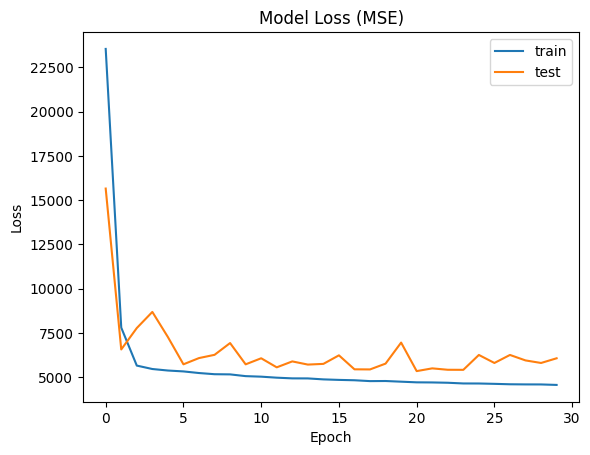

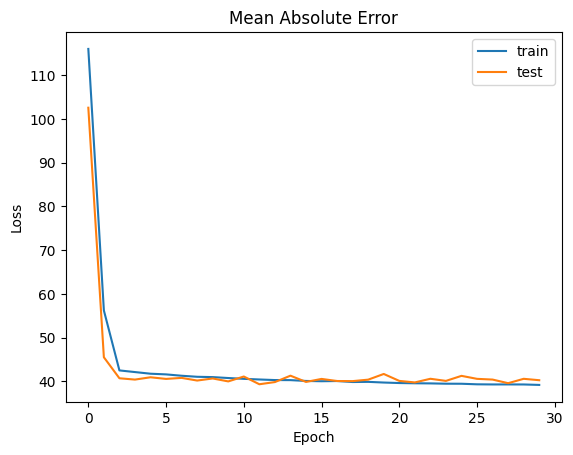

In [17]:
y_train_pred_bm = best_model.predict(X_train)
y_test_pred_bm = best_model.predict(X_test)

print('Training MSE:', round(mean_squared_error(y_train, y_train_pred_bm),4))
print('Testing MSE:', round(mean_squared_error(y_test, y_test_pred_bm),4))
print()
print('Training MAE:', round(mean_absolute_error(y_train, y_train_pred_bm),4))
print('Testing MAE:', round(mean_absolute_error(y_test, y_test_pred_bm),4))
print()
print('Training r2:', round(r2_score(y_train, y_train_pred_bm),4))
print('Testing r2:', round(r2_score(y_test, y_test_pred_bm),4))

plt.plot(history_best.history['loss'])
plt.plot(history_best.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history_best.history['mean_absolute_error'])
plt.plot(history_best.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.show()

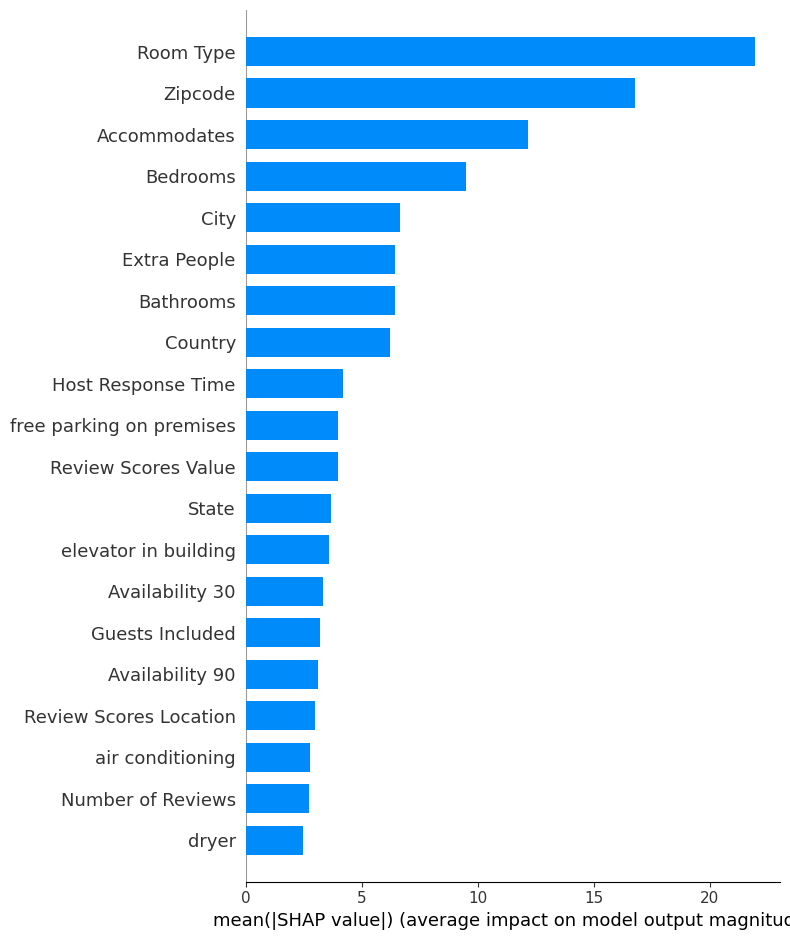

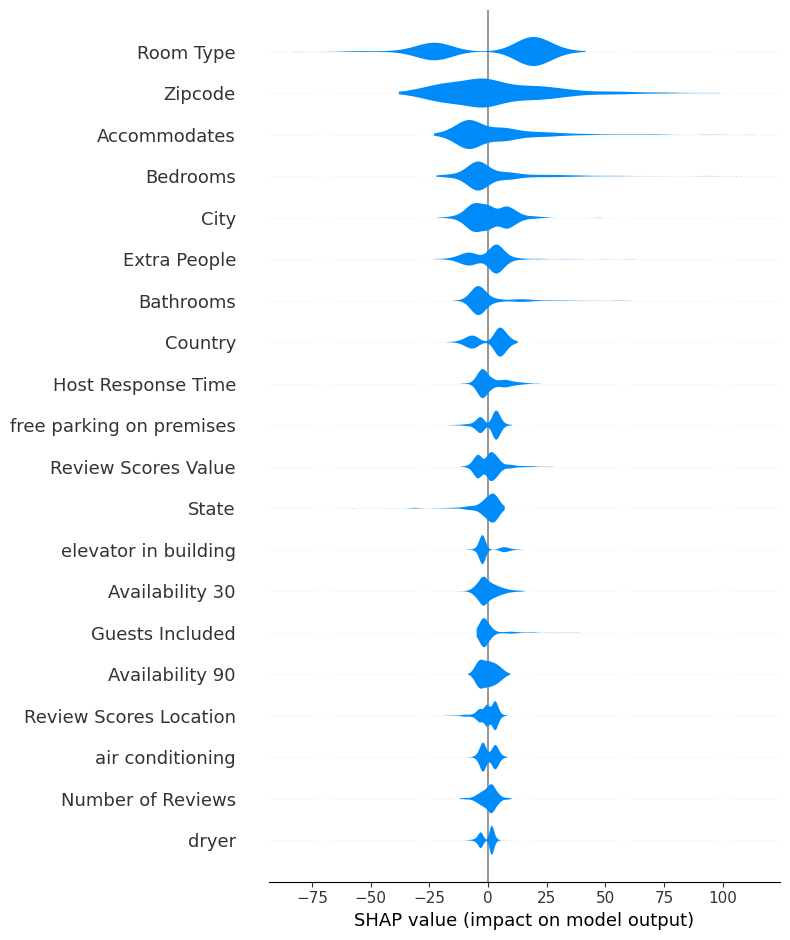

In [14]:
explainer = shap.Explainer(best_model.predict, X_test)
shap_values = explainer(X_test[:500]).values
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = X.columns)
shap.summary_plot(shap_values, plot_type = 'violin', feature_names = X.columns)